In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explore data

In [2]:
data = pd.read_csv("dataset_mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info() # list the features and main information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7921 non-null   object
 1   cap-shape                 7921 non-null   object
 2   cap-surface               7921 non-null   object
 3   cap-color                 7921 non-null   object
 4   bruises                   7921 non-null   object
 5   odor                      7921 non-null   object
 6   gill-attachment           7921 non-null   object
 7   gill-spacing              7921 non-null   object
 8   gill-size                 7921 non-null   object
 9   gill-color                7921 non-null   object
 10  stalk-shape               7921 non-null   object
 11  stalk-root                7921 non-null   object
 12  stalk-surface-above-ring  7921 non-null   object
 13  stalk-surface-below-ring  7921 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.isnull().any() 
# check if there is any missing data
# no missing data found
# however, missing data might labeled

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [5]:
for column in data.columns:
    print(column, "\n  ",data[column].unique())

class 
   ['p' 'e']
cap-shape 
   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 
   ['s' 'y' 'f' 'g']
cap-color 
   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 
   ['t' 'f']
odor 
   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 
   ['f' 'a']
gill-spacing 
   ['c' 'w']
gill-size 
   ['n' 'b']
gill-color 
   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 
   ['e' 't']
stalk-root 
   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 
   ['s' 'f' 'k' 'y']
stalk-surface-below-ring 
   ['s' 'f' 'y' 'k']
stalk-color-above-ring 
   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 
   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 
   ['p']
veil-color 
   ['w' 'n' 'o' 'y']
ring-number 
   ['o' 't' 'n']
ring-type 
   ['p' 'e' 'l' 'f' 'n']
spore-print-color 
   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 
   ['s' 'n' 'a' 'v' 'y' 'c']
habitat 
   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


There are some '?' in the set at least in one feature
Let's count how many of the missing there is

In [6]:
for i in range(len(data.columns)):   # 0 to 22
    if ('?' in np.array(data.iloc[:,i])):   # if '?' appears in an c olumn
        print(data.iloc[:,i].value_counts())   # count values in a column and print


b    3687
?    2419
e    1092
c     535
r     188
Name: stalk-root, dtype: int64


2419/7921 or 30.5% of the values in the stalk-root column are written as 'missing'

More research is needed. Most likely '?' means that stalk root is absent. Column will not be dropped until more research is done

## Replace data using column definitions (e.g. 'p' to poisonous)

In [7]:
data_definitions = pd.read_csv("columns_definitions.csv")
data_definitions

,column_name,defs
0,class,"{""e"": ""edible"", ""p"": ""poisonous""}"
1,cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
2,cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
3,cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
4,bruises,"{""t"": ""bruises"", ""f"": ""no""}"
5,odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
6,gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
7,gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
8,gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"
9,gill-color,"{""k"": ""black"", ""n"": ""brown"", ""b"": ""buff"", ""h"":..."


In [8]:
data_definitions.set_index('column_name') 
# set column_name as index column, for convenience 

,defs
column_name,
class,"{""e"": ""edible"", ""p"": ""poisonous""}"
cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
bruises,"{""t"": ""bruises"", ""f"": ""no""}"
odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"


In [9]:
columns_dictionaries_list = [] # initialize a list which will contain dictionaries

for column_name in data_definitions.index:
    s = data_definitions.loc[column_name]['defs']
    columns_dictionaries_list.append(eval(s))

columns_dictionaries_list[:5]

[{'e': 'edible', 'p': 'poisonous'},
 {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 {'t': 'bruises', 'f': 'no'}]

In [10]:
# check whether column names are the same in both main dataset and columns description dataset

features_data = list(data.columns)
features_data_definitions = list(data_definitions['column_name'])

if (set(features_data)==set(features_data_definitions)):
    print("Same")

Same


Iterate through each column and change values to its description

In [11]:
i = 0
for column_name in features_data:
    data[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Submission dataset analysis

In [13]:
data_submission = pd.read_csv("submission_mushrooms.csv")
data_submission.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,v,d
1,1,b,s,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,2,x,f,n,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
3,3,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
4,4,f,s,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [14]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                203 non-null    int64 
 1   cap-shape                 203 non-null    object
 2   cap-surface               203 non-null    object
 3   cap-color                 203 non-null    object
 4   bruises                   203 non-null    object
 5   odor                      203 non-null    object
 6   gill-attachment           203 non-null    object
 7   gill-spacing              203 non-null    object
 8   gill-size                 203 non-null    object
 9   gill-color                203 non-null    object
 10  stalk-shape               203 non-null    object
 11  stalk-root                203 non-null    object
 12  stalk-surface-above-ring  203 non-null    object
 13  stalk-surface-below-ring  203 non-null    object
 14  stalk-color-above-ring    

'Unnamed: 0' is useless

In [15]:
# drop useless column

data_submission.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
# check for missing data

data_submission.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

Check for '?' is th dataset

In [17]:
for i in range(len(data_submission.columns)):   # 0 to 21
    if ('?' in np.array(data_submission.iloc[:,i])):   # if '?' appears in an column
        print(data_submission.iloc[:,i].value_counts())   # count values in a column and print
    

b    89
?    61
e    28
c    21
r     4
Name: stalk-root, dtype: int64


61/202 or 30.2% values in the stalk-root column are' missing'. Almost same percentage as in the original data.
Most likely it menas that the root is absent in the mushroom. This column decided to not being dropped from the dataset

Replace values with definitions from the definition list of dictionaries we created earlier

In [18]:
i = 1
for column_name in features_data[1:]: # [1:] -> we don't need 'class' column
    data_submission[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1
    
data_submission.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,scaly,yellow,no,foul,free,close,broad,chocolate,enlarging,...,silky,brown,buff,partial,white,one,large,chocolate,several,woods
1,bell,smooth,yellow,bruises,anise,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,convex,fibrous,brown,bruises,none,free,close,broad,purple,tapering,...,smooth,pink,white,partial,white,one,pendant,brown,solitary,woods
3,knobbed,smooth,brown,no,fishy,free,close,narrow,buff,tapering,...,smooth,white,pink,partial,white,one,evanescent,white,several,paths
4,flat,smooth,red,no,foul,free,close,narrow,buff,tapering,...,silky,white,pink,partial,white,one,evanescent,white,several,woods


In [19]:
# compare output with original data set
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


Convert original dataset into dummy variable, which are mutually exclusive columns of each feature

In [20]:
data_dummies = data.drop(columns=['class'],axis=1).copy()
data_dummies = pd.get_dummies(data_dummies)
data_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import label_binarize

# label_binarize converts 'class' to binary, instead of two dummy variables

data_dummies['class'] = label_binarize(data['class'], classes=['edible','poisonous'])
data_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [22]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']

In [23]:
# ROC curve

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve

# Logistic regression with regular 75/25 split, one try

model = LR()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

print("Accuracy:",accuracy_LR)

Accuracy: 1.0


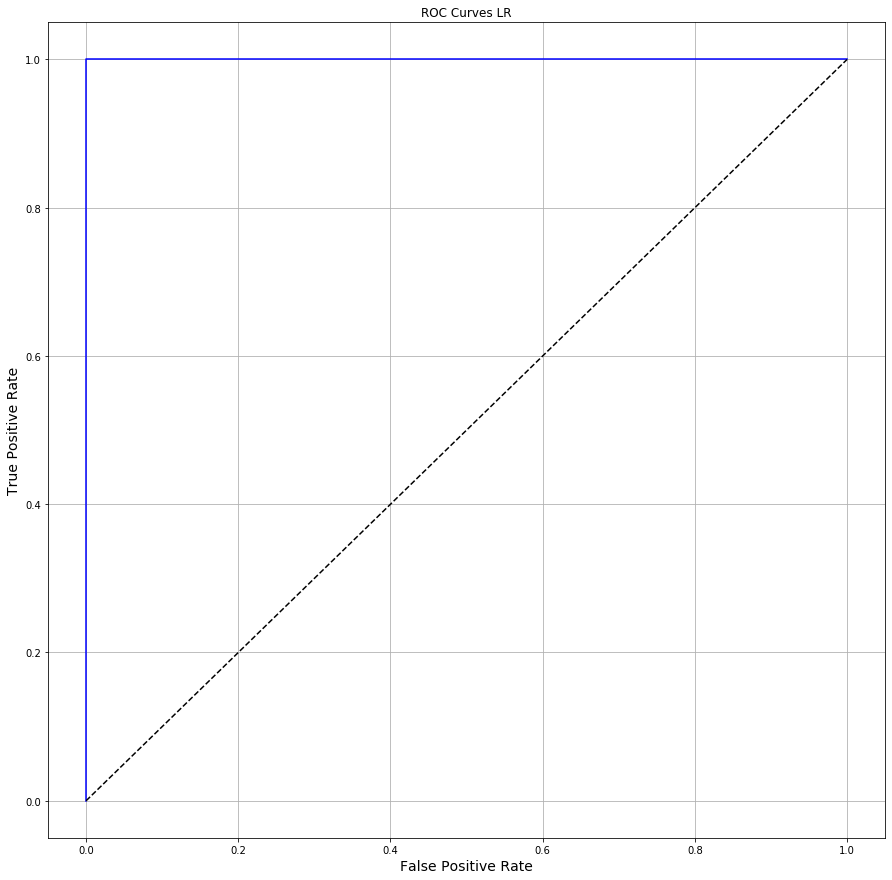

In [24]:
plt.plot(FPR_LR, TPR_LR, c="blue")
plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curves LR")
plt.gcf().set_size_inches(15,15)
#wow

In [25]:
# covert string to numbers in dataset

from sklearn.preprocessing import LabelEncoder

data_copy = data.copy()
labelencoder = LabelEncoder()
for column in data_copy.columns:
    data_copy[column] = labelencoder.fit_transform(data_copy[column])
data_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [26]:
data_copy.info() # see the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     7921 non-null   int64
 1   cap-shape                 7921 non-null   int64
 2   cap-surface               7921 non-null   int64
 3   cap-color                 7921 non-null   int64
 4   bruises                   7921 non-null   int64
 5   odor                      7921 non-null   int64
 6   gill-attachment           7921 non-null   int64
 7   gill-spacing              7921 non-null   int64
 8   gill-size                 7921 non-null   int64
 9   gill-color                7921 non-null   int64
 10  stalk-shape               7921 non-null   int64
 11  stalk-root                7921 non-null   int64
 12  stalk-surface-above-ring  7921 non-null   int64
 13  stalk-surface-below-ring  7921 non-null   int64
 14  stalk-color-above-ring    7921 non-null 

#### Correlation heatmap

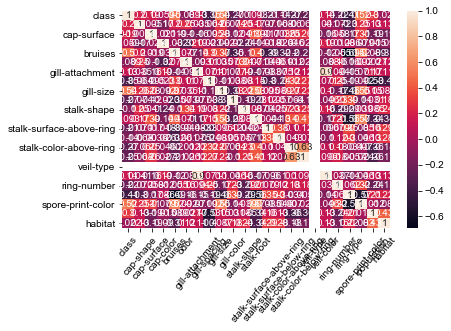

In [27]:
p = sns.heatmap(data_copy.corr(), annot=True,annot_kws={'size':10})
sns.set(rc={'figure.figsize':(20,20)})
p.set_xticklabels(rotation = 50,labels = list(data_copy.columns))
plt.show()

We can notice a useless feature 'veil-type' that has only one value in a whole column

In [28]:
# dummy data is too big to observe in Jupyter, it needs to be analyzed in an Excel file

data_corr = data_dummies.corr(method="pearson").copy() 
#data_corr.to_excel("output.xlsx")  # comment out - don't overwrite the changed file

In [29]:
# remove useless feature "veil-type" from the main dataset, dummy variables dataset, and training dataset

data.drop(columns=['veil-type'],axis=1,inplace=True)
data_copy.drop(columns=['veil-type'],axis=1,inplace=True)
data_dummies.drop(columns=['veil-type_partial'],axis=1,inplace=True)
data_submission.drop(columns=['veil-type'],axis=1,inplace=True)

In [30]:
data_submission_dummies = data_submission.copy()
data_submission_dummies = pd.get_dummies(data_submission_dummies)
data_submission_dummies.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
# check the difference in columns

features_data1 = list(data_submission_dummies.columns)
features_data2 = list(data_dummies.columns)
if(set(features_data1)==set(features_data2)):
    print("Same")
else: print("Not same")

Not same


In [32]:
data_dummies.shape

(7921, 117)

In [33]:
data_submission_dummies.shape

(203, 108)

#### Try to predict class from submission dataset using logistic regression and after dropping the columns
#### Try to reduce data using PCA

In [34]:

dropped_data = data_dummies.drop(columns=['cap-color_purple', 
                                       'stalk-color-below-ring_cinnamon', 
                                       'odor_musty', 'spore-print-color_yellow', 
                                       'stalk-color-above-ring_cinnamon', 
                                       'ring-number_none', 
                                       'ring-type_none', 
                                       'cap-shape_sunken'],axis=1)

In [35]:
X = dropped_data.drop(columns=['class'],axis=1)
Y = dropped_data['class']
X.shape,data_submission_dummies.shape

((7921, 108), (203, 108))

In [36]:
features_data1 = list(data_submission_dummies.columns)
features_data2 = list(dropped_data.drop(columns=['class'],axis=1).columns)
if(set(features_data1)==set(features_data2)):
    print("Same")
else: print("Not same")

Same


Now the main dataset and te submission dataset are have same fatures

In [37]:
X = np.array(X)

In [38]:
# 1 run test/train split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts, KFold

model = LogisticRegression()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train)
class_col = model.predict(data_submission_dummies)

class_col#.reshape(-1,1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0])

In [39]:
# 10-fold 

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
accuracy_kfold_list

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9974747474747475]

In [40]:
# predict class using the best model (actually all models where almost same with ~99.9 % accuracy)

class_col_kfold = model.predict(data_submission_dummies)
    
print(class_col_kfold)

[1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0]


In [41]:
class_col_kfold=['poisonous' if x==1 else 'edible' for x in class_col_kfold]
class_col_kfold[:10]

['poisonous',
 'edible',
 'edible',
 'poisonous',
 'poisonous',
 'edible',
 'edible',
 'edible',
 'edible',
 'edible']

In [42]:
data_submission_dummies.insert(loc=0, column='class_predicted', value=class_col_kfold)
data_submission_dummies[:10]

,class_predicted,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,edible,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,edible,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,poisonous,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,poisonous,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5,edible,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
6,edible,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,edible,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
8,edible,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,edible,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [43]:
# PCA try

from sklearn import preprocessing as p
from sklearn.decomposition import PCA

accuracy_pca_list = []
for i in range(1,6):
    
    x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])

    st = p.StandardScaler().fit(x_train)
    new = st.transform(x_train)
    pca = PCA(n_components=i).fit(new)
    x_train = pca.transform(new)
    x_test = pca.transform(x_test)

    LR = LogisticRegression() 
    LR.fit(x_train, y_train) # Train

    y_pred = LR.predict(x_test)

    accuracy_pca = accuracy_score(y_test, y_pred)
    accuracy_pca_list.append(accuracy_pca)
    
accuracy_pca_list

[0.8586572438162544,
 0.8717819283190308,
 0.8833922261484098,
 0.8707723372034326,
 0.8505805148914689]

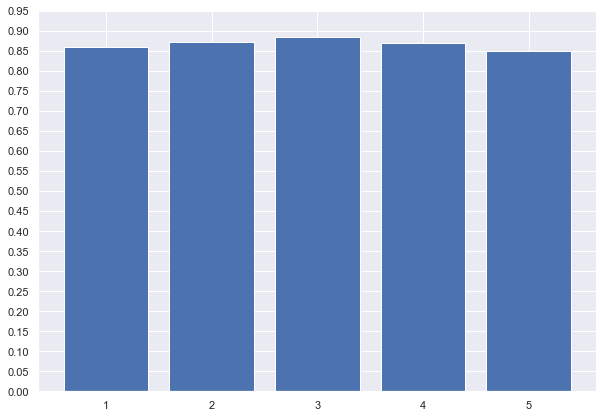

In [44]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(np.arange(1,6), accuracy_pca_list) 
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

#### Try the same, but this time we add missing columns to data_submission_dummies by setting values to 0s, instead of dropping those columns from the main dataset

In [45]:
# data_dummies has columns that data_submission_dummies does not have

print(len(data_dummies.columns))
missing_cols = set(list(data_dummies.columns))-set(list(data_submission_dummies.columns)) - {'class'}
missing_cols
# ignore class

117


{'cap-color_purple',
 'cap-shape_sunken',
 'odor_musty',
 'ring-number_none',
 'ring-type_none',
 'spore-print-color_yellow',
 'stalk-color-above-ring_cinnamon',
 'stalk-color-below-ring_cinnamon'}

In [46]:
for i in missing_cols:
    print(data_dummies.columns.get_loc(i),i)

5 cap-shape_sunken
92 ring-type_none
75 stalk-color-below-ring_cinnamon
16 cap-color_purple
86 ring-number_none
66 stalk-color-above-ring_cinnamon
27 odor_musty
102 spore-print-color_yellow


In [47]:
data_subm_dumm_raised = data_submission_dummies.copy()

In [48]:
# add missing columns into the data_submission_dummies and set values to 0s
j=0
for i in missing_cols:
    data_subm_dumm_raised.insert(data_dummies.columns.get_loc(i), i, 0, True)
    
data_subm_dumm_raised.shape

(203, 117)

In [49]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']
X.shape, data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1).shape  # check number of columns

((7921, 116), (203, 116))

In [50]:
# run 10-fold again

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_dummies['class'][train_idx]
    y_test = data_dummies['class'][test_idx]
    
    y_pred = LR.fit(x_train, y_train).predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
class_col_kfold = model.predict(data_subm_dumm_raised.drop(columns=['class_predicted'],axis=1))

print("Accuracies in 10-forld CV\n",[round(num, 6) for num in accuracy_kfold_list])
print("\n\nClass prediction\n",class_col_kfold)

#data_sub = data_subm_dumm_raised.copy() # change the name. not the best dataframe name

Accuracies in 10-forld CV
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Class prediction
 [1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0]


In [51]:
# update class_predicted column (although it is >99% chance that it did not change)

class_col_kfold=['Poisonous' if x==1 else 'Edible' for x in class_col_kfold]
data_subm_dumm_raised['class_predicted'] = class_col_kfold
data_subm_dumm_raised[:5]

,class_predicted,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,Poisonous,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,Edible,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Edible,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Poisonous,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,Poisonous,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
class_predicted = data_subm_dumm_raised['class_predicted'].value_counts()
print(class_predicted)

Edible       112
Poisonous     91
Name: class_predicted, dtype: int64


Distribution of the predicted class in the submission data

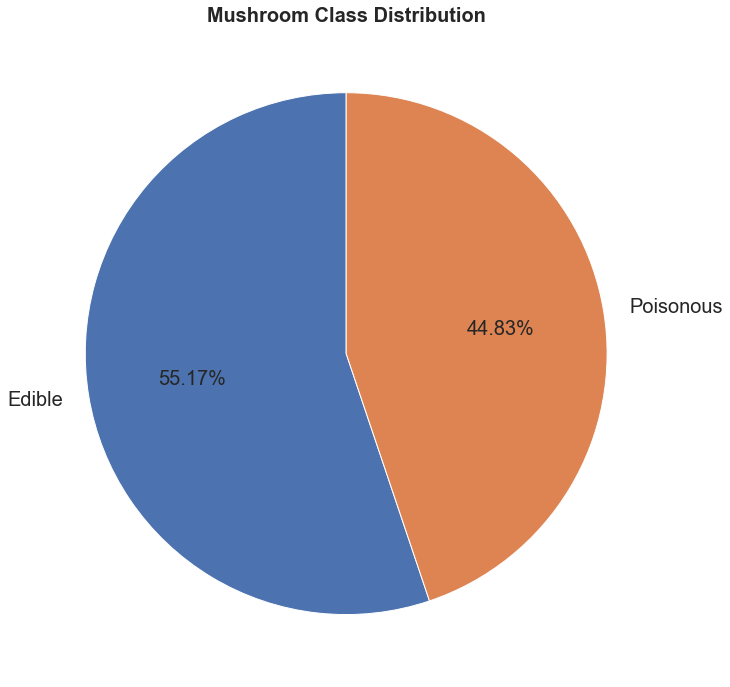

In [53]:
plt.pie(class_predicted, 
        labels=['Edible', 'Poisonous'], 
        startangle=90, 
        autopct='%1.2f%%',
        textprops={'fontsize': 20})
plt.title("Mushroom Class Distribution", weight='bold', size=20)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## Data exploration

Now show the distribution of poisonous/edible in the main dataset

In [54]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


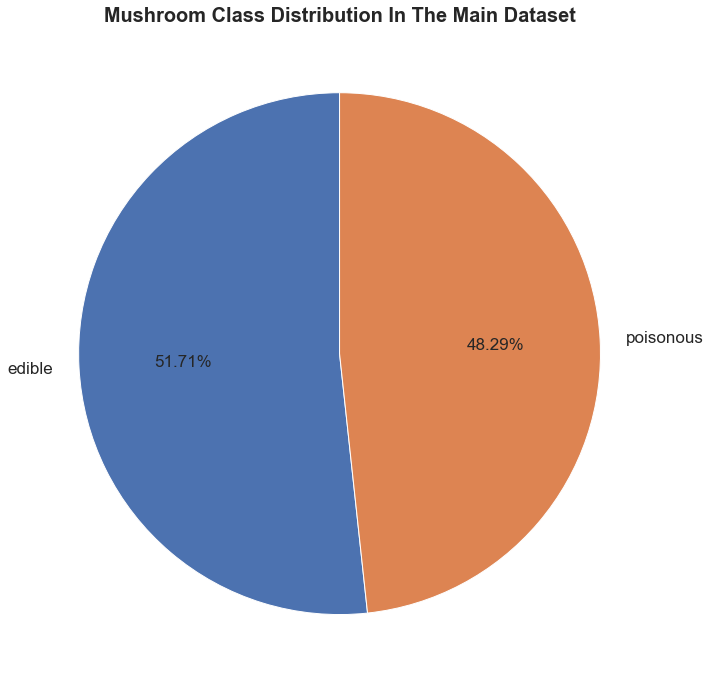

In [55]:
plt.pie(data['class'].value_counts(), 
        labels=['edible', 'poisonous'], 
        startangle=90, 
        autopct='%1.2f%%',
        textprops={'fontsize': 17})
plt.title("Mushroom Class Distribution In The Main Dataset", weight='bold', size=20)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Cap-color and Gill-color have the most number of value: 10 and 12

#### Cap color

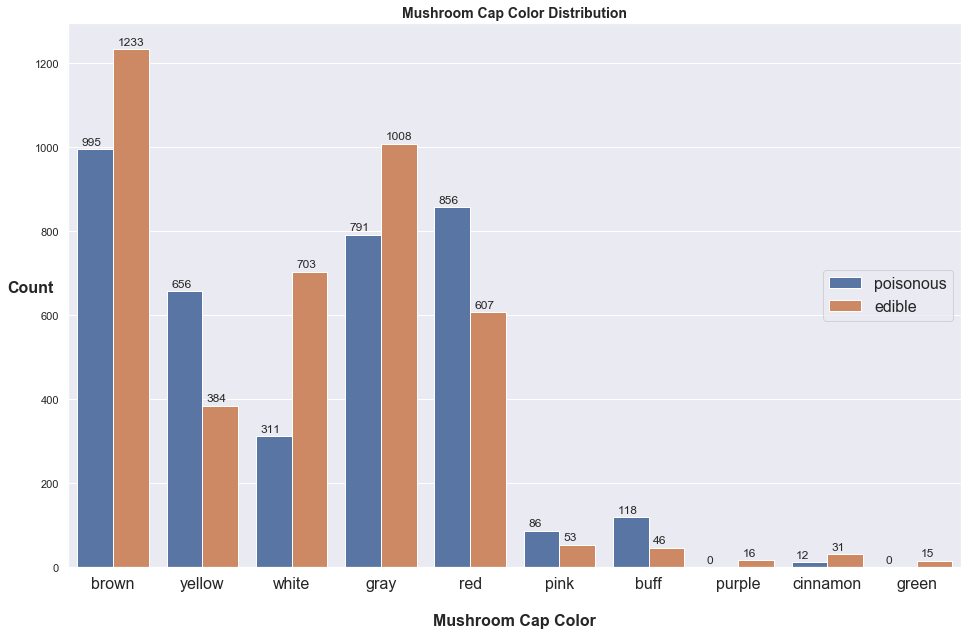

In [56]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='cap-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nMushroom Cap Color",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
plt.title('Mushroom Cap Color Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

Buff color is very interesting, it is always pousonous!

In [57]:
# cap-color distribution dataframe

cap_color_distr = pd.DataFrame(data.groupby(['cap-color','class']).size(), columns=["Total"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


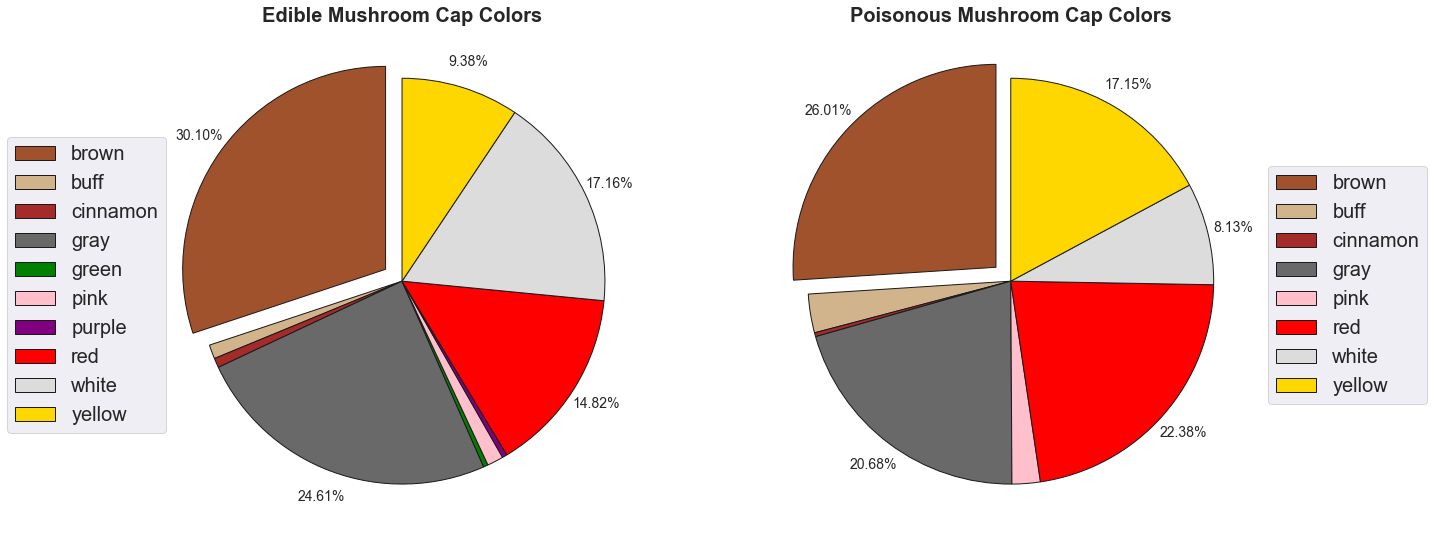

In [58]:
edible_capcolor_counts = cap_color_distr.xs('edible', level='class')
pois_capcolor_counts = cap_color_distr.xs('poisonous', level='class')

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''
labels = np.array(edible_capcolor_counts.index)
sizes = np.array(edible_capcolor_counts).transpose()
colors = ['sienna','tan','brown','dimgray','green','pink','purple','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

labels1 = np.array(pois_capcolor_counts.index)
sizes1 = np.array(pois_capcolor_counts).transpose()
colors1 = ['sienna','tan','brown','dimgray', 'pink','red','gainsboro','gold']
explode1 = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.subplot(121)
plt.title('Edible Mushroom Cap Colors', weight='bold', size=20)
plt.pie(sizes, 
        explode=explode, 
        colors=colors, 
        autopct=my_autopct,
        textprops={'fontsize': 14}, 
        pctdistance=1.13, 
        startangle=90,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.gcf().set_size_inches(20,20)
plt.legend(labels, bbox_to_anchor=(0.02,0.5), loc="center left", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.subplot(122)
plt.title('Poisonous Mushroom Cap Colors', weight='bold', size=20)
plt.pie(sizes1, 
        explode=explode1, 
        colors=colors1, 
        autopct=my_autopct,
        textprops={'fontsize': 14}, 
        pctdistance=1.13, 
        startangle=90,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.gcf().set_size_inches(20,20)
plt.legend(labels1, bbox_to_anchor=(1.02,0.5), loc="center right", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

#### Gill color

In [59]:
# cap-color distribution dataframe
gill_color_distr = pd.DataFrame(data.groupby(['gill-color','class']).size(), columns=["Total"])

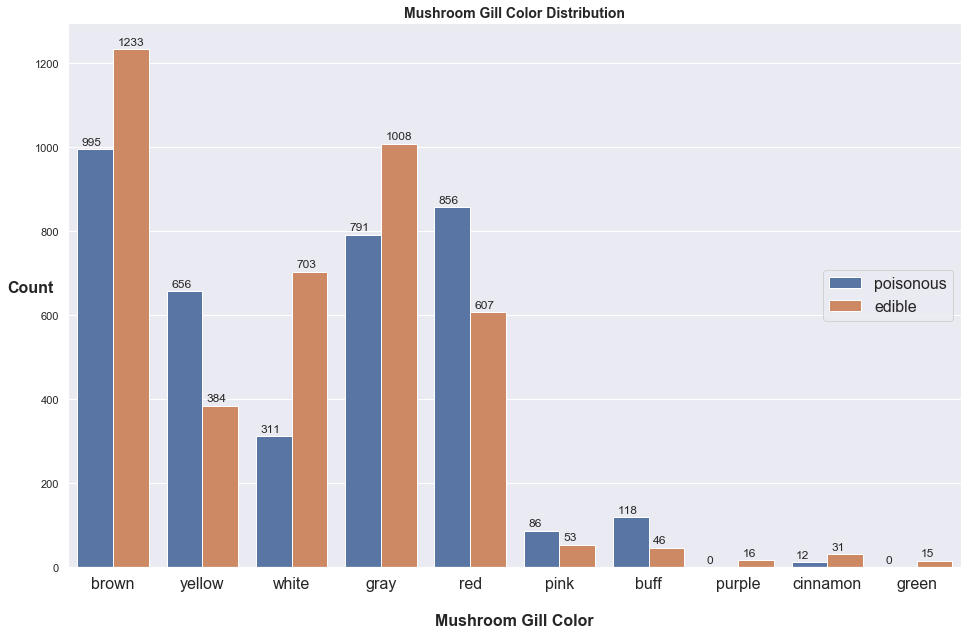

In [60]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='cap-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nMushroom Gill Color",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
plt.title('Mushroom Gill Color Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


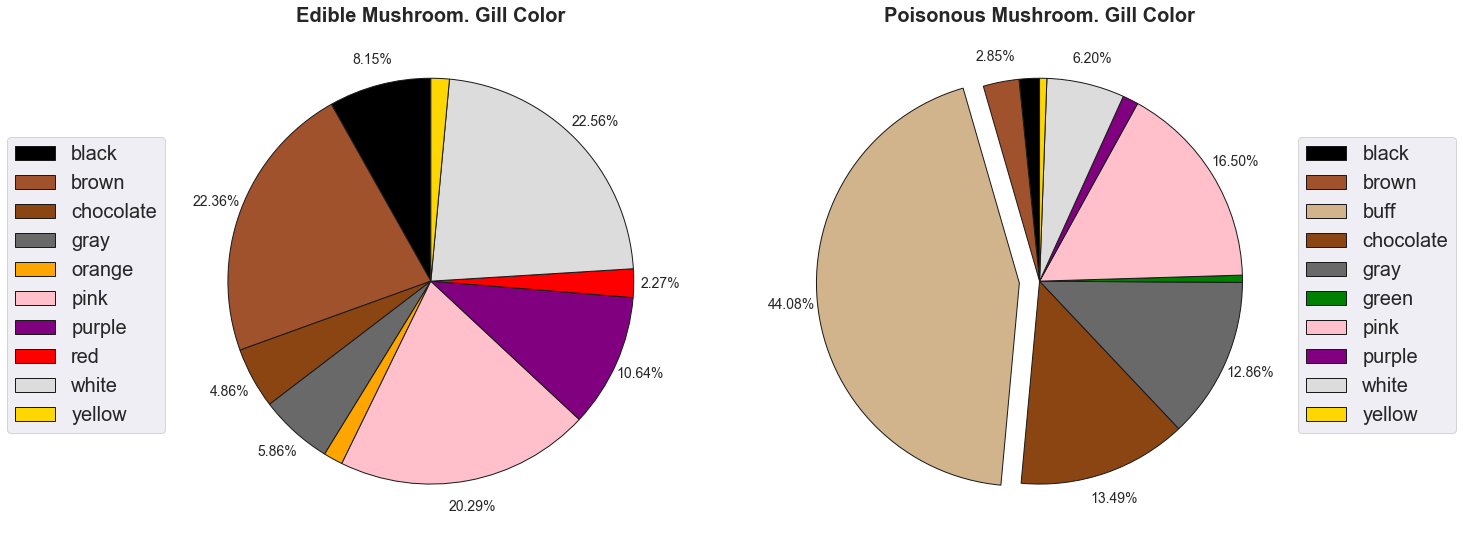

In [61]:
edible_gillcolor_counts = gill_color_distr.xs('edible', level='class')
pois_gillcolor_counts = gill_color_distr.xs('poisonous', level='class')

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 2 else ''
labels = np.array(edible_gillcolor_counts.index)
sizes = np.array(edible_gillcolor_counts).transpose()
colors = ['black','sienna','saddlebrown','dimgray','orange','pink','purple','red','gainsboro','gold']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

labels1 = np.array(pois_gillcolor_counts.index)
sizes1 = np.array(pois_gillcolor_counts).transpose()
colors1 = ['black','sienna','tan','saddlebrown','dimgray', 'green','pink','purple','gainsboro','gold']
explode1 = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.subplot(121)
plt.title('Edible Mushroom. Gill Color', weight='bold', size=20)
plt.pie(sizes, 
        colors=colors,
        autopct=my_autopct,
        textprops={'fontsize': 14},
        pctdistance=1.13, 
        startangle=90,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.gcf().set_size_inches(20,20)
plt.legend(labels, bbox_to_anchor=(0.0,0.5), loc="center left", fontsize=20, 
           bbox_transform=plt.gcf().transFigure)

explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.subplot(122)
plt.title('Poisonous Mushroom. Gill Color', weight='bold', size=20)
plt.pie(sizes1, 
        colors=colors1, 
        autopct=my_autopct,
        textprops={'fontsize': 14}, 
        pctdistance=1.13, 
        explode=explode,
        startangle=90, 
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.gcf().set_size_inches(20,20)
plt.legend(labels1, bbox_to_anchor=(1.02,0.5), loc="center right", fontsize=20, 
          bbox_transform=plt.gcf().transFigure)

plt.show()

#### Habitat

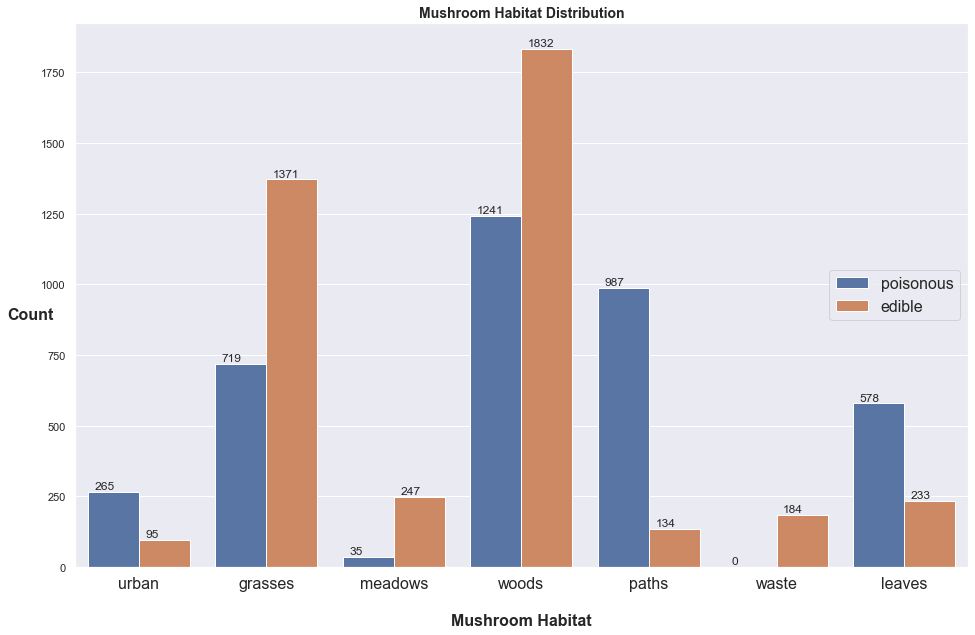

In [62]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='habitat',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nMushroom Habitat",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.05,0.45)
plt.title('Mushroom Habitat Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

In [63]:
# habitat distribution dataframe
habitat_color_distr = pd.DataFrame(data.groupby(['habitat','class']).size(), columns=["Total"])

In [64]:
pd.DataFrame(data_dummies.corr()['class'].sort_values())

,class
odor_none,-0.788003
ring-type_pendant,-0.541726
gill-size_broad,-0.538675
bruises_bruises,-0.501283
stalk-surface-above-ring_smooth,-0.488927
...,...
gill-size_narrow,0.538675
stalk-surface-below-ring_silky,0.574048
stalk-surface-above-ring_silky,0.586190
odor_foul,0.625577


In [65]:
class_habitat = data.groupby(['class','habitat'])['habitat'].size().reset_index(name='count')
edible_habitat_counts = class_habitat.iloc[:7, :]
poisonous_habitat_counts = class_habitat.iloc[7:,  :]
edible_habitat_counts

,class,habitat,count
0,edible,grasses,1371
1,edible,leaves,233
2,edible,meadows,247
3,edible,paths,134
4,edible,urban,95
5,edible,waste,184
6,edible,woods,1832


In [66]:
poisonous_habitat_counts

,class,habitat,count
7,poisonous,grasses,719
8,poisonous,leaves,578
9,poisonous,meadows,35
10,poisonous,paths,987
11,poisonous,urban,265
12,poisonous,woods,1241


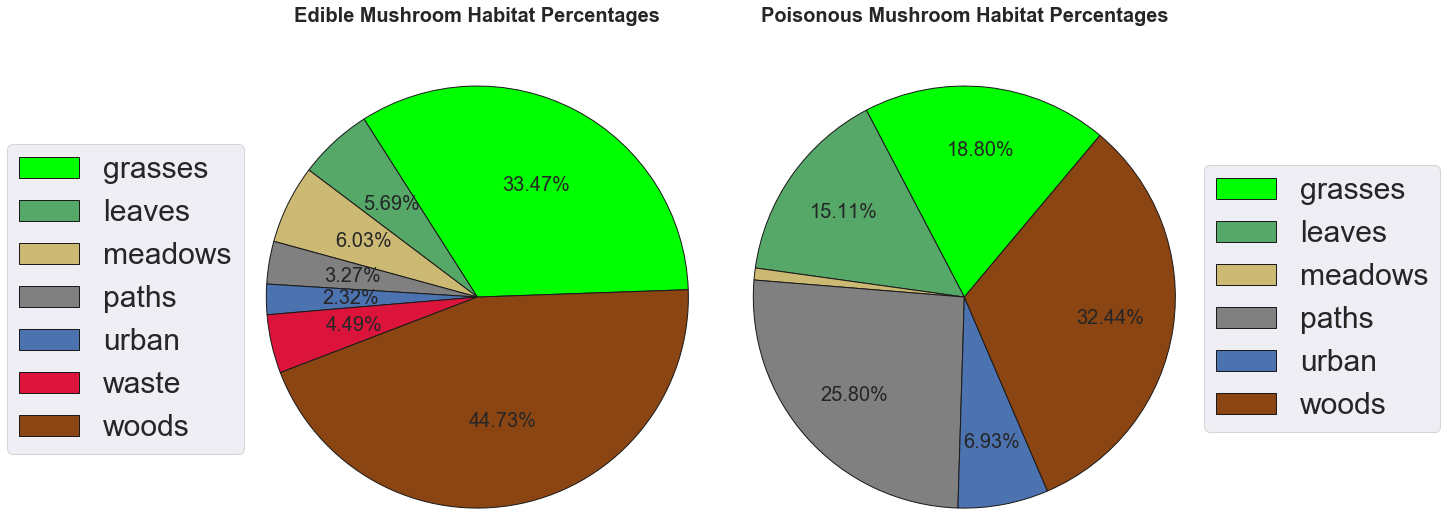

In [67]:
count = edible_habitat_counts['count']
labels = edible_habitat_counts['habitat']
colors = ['lime','g','y','grey','b','crimson','saddlebrown']

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''

plt.subplot(121)
plt.pie(count,
       colors = colors,
       startangle=2,
       autopct='%1.2f%%',
       textprops={'fontsize':20},
       #pctdistance=1.19,
        radius=1.3,
       wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.title('Edible Mushroom Habitat Percentages\n\n\n', weight='bold', size=20)
plt.legend(labels, bbox_to_anchor=(-0.12,0.5), loc="center left", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

count1 = poisonous_habitat_counts['count']
label1 = poisonous_habitat_counts['habitat']
colorsp = ['lime','g','y','grey','b','saddlebrown']
plt.subplot(122)
plt.pie(count1,
       colors = colorsp,
       startangle=50,
       autopct=my_autopct,
       pctdistance=0.7,
        radius=1.3,
       textprops={'fontsize':20},
       wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.title('Poisonous Mushroom Habitat Percentages\n\n\n', weight='bold', size=20)
plt.legend(label1, bbox_to_anchor=(1.15,0.5), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

plt.show()

#### After finding chi2 scores in Chi Square section, it is interesting that Odor has the highest chi square score. Let's analyse it here

In [68]:
class_odor = data.groupby(['class','odor'])['odor'].size().reset_index(name='count')
edible_odor_counts = class_odor.iloc[:3, :]
poisonous_odor_counts = class_odor.iloc[ 3:,  :]
class_odor

,class,odor,count
0,edible,almond,394
1,edible,anise,380
2,edible,none,3322
3,poisonous,creosote,189
4,poisonous,fishy,558
5,poisonous,foul,2120
6,poisonous,musty,36
7,poisonous,none,113
8,poisonous,pungent,250
9,poisonous,spicy,559


In [69]:
poisonous_habitat_counts

,class,habitat,count
7,poisonous,grasses,719
8,poisonous,leaves,578
9,poisonous,meadows,35
10,poisonous,paths,987
11,poisonous,urban,265
12,poisonous,woods,1241


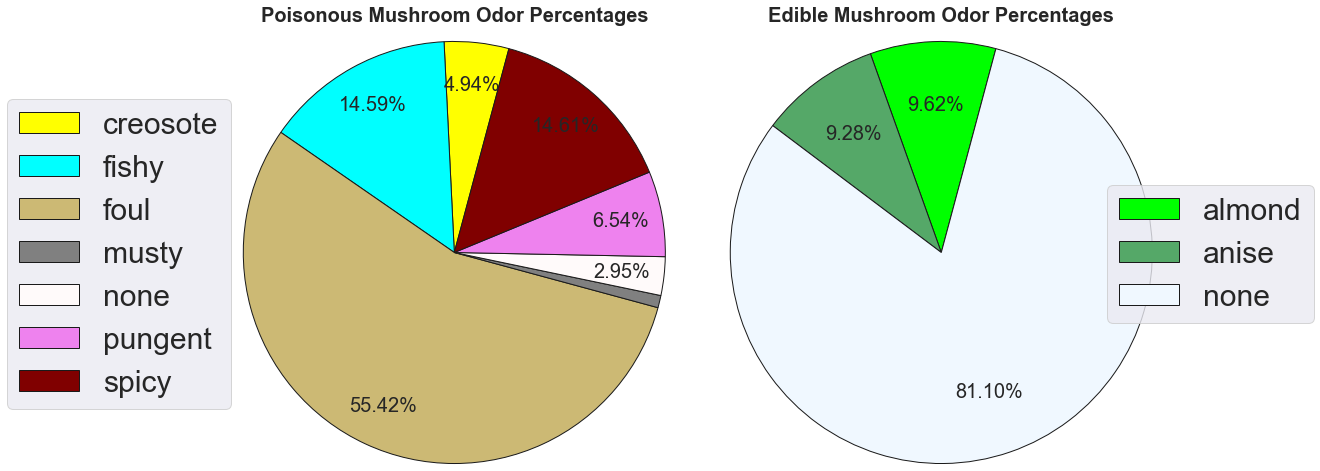

In [70]:
count_odor = poisonous_odor_counts['count']
label = poisonous_odor_counts['odor']
colors = ['yellow','cyan','y','grey','snow','violet','maroon']

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''

plt.subplot(121)
plt.pie(count_odor,
       colors = colors,
       startangle=75,
       autopct=my_autopct,
       pctdistance=0.8,
        radius=1.3,
       textprops={'fontsize':20},
       wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.title('Poisonous Mushroom Odor Percentages\n', weight='bold', size=20)
plt.legend(label, bbox_to_anchor=(-0.1,0.5), loc="center left", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)


count = edible_odor_counts['count']
label = edible_odor_counts['odor']
colors = ['lime','g','aliceblue']
plt.subplot(122)
plt.pie(count,
       colors = colors,
       startangle=75,
       autopct='%1.2f%%',
       pctdistance=0.7,
        radius=1.3,
       textprops={'fontsize':20},
       wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.title('Edible Mushroom Odor Percentages\n', weight='bold', size=20)
plt.legend(label, bbox_to_anchor=(1.06,0.5), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

plt.show()

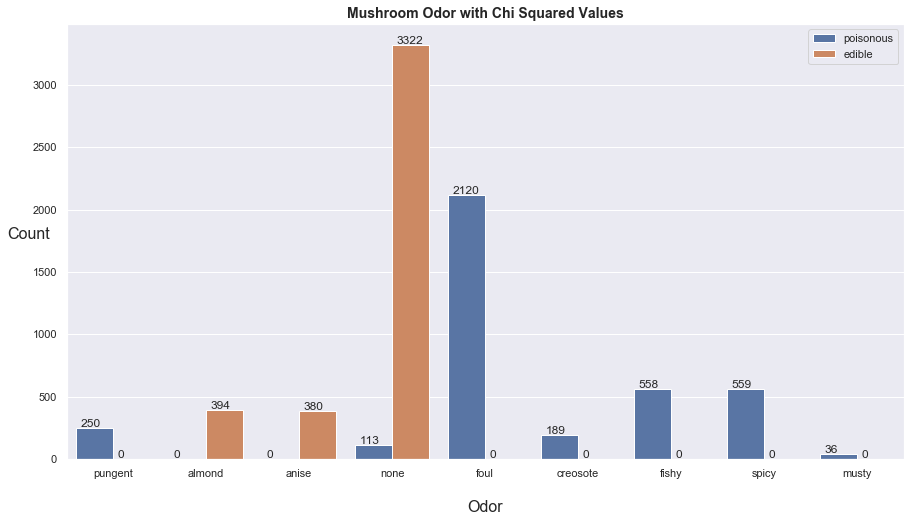

In [71]:
# this cell appers twice

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.xlabel("\nOdor",fontsize=16)
plt.ylabel("Count",fontsize=16, rotation=0)
plt.title('Mushroom Odor with Chi Squared Values', weight='bold', size=14)
plt.legend()
plt.show()

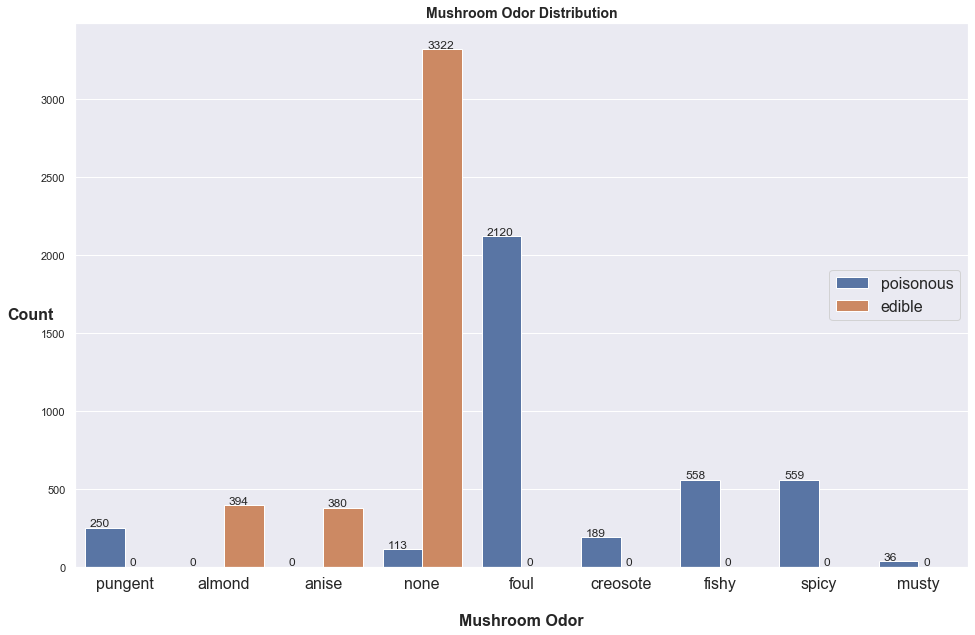

In [72]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='odor',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nMushroom Odor",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.05,0.45)
plt.title('Mushroom Odor Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

# Chi Square   =================================================

In [73]:
# add class dummy variables

data_copy['class_edible']=[1 if x==0 else 0 for x in data_copy['class']]
data_copy['class_poisonous']=data_copy['class']

In [74]:
import scipy.stats as stats

data_for_chi2 = data.drop(columns=['class'],axis=1)
p_values = []
chi2_scores = []

for column in data_for_chi2:
    nl = "\n"
    crosstab = pd.crosstab(data['class'], data_for_chi2[column])
    #print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    #print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    p_values.append(p)
    chi2_scores.append(chi2)
chi2_scores[:5]

[474.859241481268,
 302.98071757055976,
 386.6795913355566,
 1988.3891278561894,
 7483.357017224165]

In [75]:
# table of p-values

features = data_for_chi2.columns.tolist()
feature_pvalues = pd.DataFrame({'feature' : features,
                                'p-values' : p_values}, 
                                columns=['feature','p-values'])
feature_pvalues

,feature,p-values
0,cap-shape,2.128300e-100
1,cap-surface,2.252408e-65
2,cap-color,9.505304e-78
3,bruises,0.000000e+00
4,odor,0.000000e+00
5,gill-attachment,4.237619e-30
6,gill-spacing,4.737407e-213
7,gill-size,0.000000e+00
8,gill-color,0.000000e+00
9,stalk-shape,5.573907e-20


In [76]:
# sorted table of p-values

feature_pvalues = feature_pvalues.sort_values('p-values',ascending=True)
feature_pvalues

,feature,p-values
20,habitat,0.000000e+00
18,spore-print-color,0.000000e+00
17,ring-type,0.000000e+00
3,bruises,0.000000e+00
4,odor,0.000000e+00
14,stalk-color-below-ring,0.000000e+00
13,stalk-color-above-ring,0.000000e+00
7,gill-size,0.000000e+00
8,gill-color,0.000000e+00
12,stalk-surface-below-ring,0.000000e+00


Top 5 chi square features have 0 p-value

In [77]:
columns = list(data.drop(columns=['class'],axis=1).columns)
columns[:5]

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

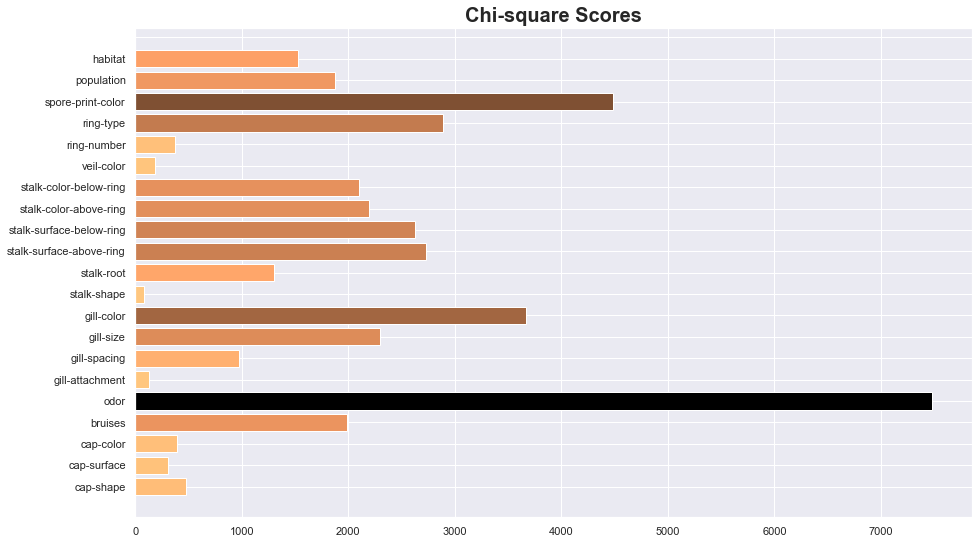

In [78]:
norm = plt.Normalize(min(chi2_scores), max(chi2_scores))
colors = plt.cm.copper_r(norm(chi2_scores)) 

fig, ax = plt.subplots()
ax.barh([i for i in range(len(chi2_scores))], chi2_scores, color=colors)
plt.gcf().set_size_inches(15, 9)
plt.yticks(range(0,22),columns)
plt.title('Chi-square Scores',weight='bold',size=20)
plt.show()

In [79]:
chi_dict = dict(zip(columns,chi2_scores)) 
chi_dict

{'cap-shape': 474.859241481268,
 'cap-surface': 302.98071757055976,
 'cap-color': 386.6795913355566,
 'bruises': 1988.3891278561894,
 'odor': 7483.357017224165,
 'gill-attachment': 129.93339064489643,
 'gill-spacing': 970.4588625237661,
 'gill-size': 2296.1086889188227,
 'gill-color': 3671.046902707636,
 'stalk-shape': 83.76441762411112,
 'stalk-root': 1306.357885269429,
 'stalk-surface-above-ring': 2724.926235597074,
 'stalk-surface-below-ring': 2622.405699407855,
 'stalk-color-above-ring': 2191.592372104833,
 'stalk-color-below-ring': 2095.1538322664674,
 'veil-color': 184.99299163286872,
 'ring-number': 369.2547107915209,
 'ring-type': 2892.99448410875,
 'spore-print-color': 4479.6627355511,
 'population': 1871.9997898300542,
 'habitat': 1529.0666896480182}

In [80]:
sorted_chi_dict = dict(sorted(chi_dict.items(), key=lambda item: item[1],reverse=True))
sorted_chi_dict

{'odor': 7483.357017224165,
 'spore-print-color': 4479.6627355511,
 'gill-color': 3671.046902707636,
 'ring-type': 2892.99448410875,
 'stalk-surface-above-ring': 2724.926235597074,
 'stalk-surface-below-ring': 2622.405699407855,
 'gill-size': 2296.1086889188227,
 'stalk-color-above-ring': 2191.592372104833,
 'stalk-color-below-ring': 2095.1538322664674,
 'bruises': 1988.3891278561894,
 'population': 1871.9997898300542,
 'habitat': 1529.0666896480182,
 'stalk-root': 1306.357885269429,
 'gill-spacing': 970.4588625237661,
 'cap-shape': 474.859241481268,
 'cap-color': 386.6795913355566,
 'ring-number': 369.2547107915209,
 'cap-surface': 302.98071757055976,
 'veil-color': 184.99299163286872,
 'gill-attachment': 129.93339064489643,
 'stalk-shape': 83.76441762411112}

In [81]:
sorted_chi_dict.keys()

dict_keys(['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape', 'cap-color', 'ring-number', 'cap-surface', 'veil-color', 'gill-attachment', 'stalk-shape'])

In [82]:
s=list(sorted_chi_dict.values())
print(s)

[7483.357017224165, 4479.6627355511, 3671.046902707636, 2892.99448410875, 2724.926235597074, 2622.405699407855, 2296.1086889188227, 2191.592372104833, 2095.1538322664674, 1988.3891278561894, 1871.9997898300542, 1529.0666896480182, 1306.357885269429, 970.4588625237661, 474.859241481268, 386.6795913355566, 369.2547107915209, 302.98071757055976, 184.99299163286872, 129.93339064489643, 83.76441762411112]


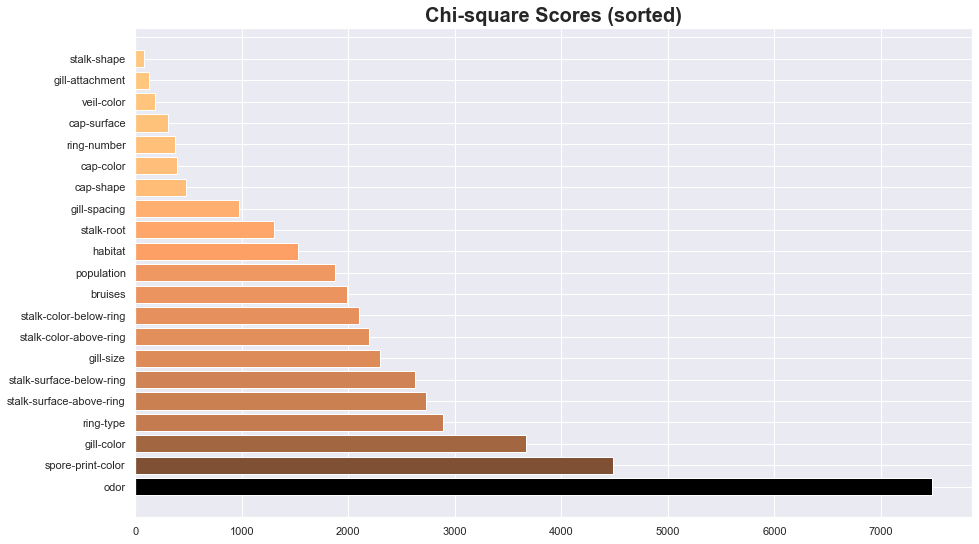

In [83]:
norm = plt.Normalize(min(list(sorted_chi_dict.values())), max(list(sorted_chi_dict.values())))
colors = plt.cm.copper_r(norm(list(sorted_chi_dict.values()))) 

fig, ax = plt.subplots()
ax.barh([i for i in range(len(sorted_chi_dict))], sorted_chi_dict.values(),color=colors)
plt.gcf().set_size_inches(15, 9)
plt.yticks(range(0,22),sorted_chi_dict.keys())
plt.title('Chi-square Scores (sorted)',weight='bold',size=20)
plt.show()

In [84]:
keys = list(sorted_chi_dict.keys())[0:5]
values = list(sorted_chi_dict.values())[0:5]
print(keys)
print(values)

['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring']
[7483.357017224165, 4479.6627355511, 3671.046902707636, 2892.99448410875, 2724.926235597074]


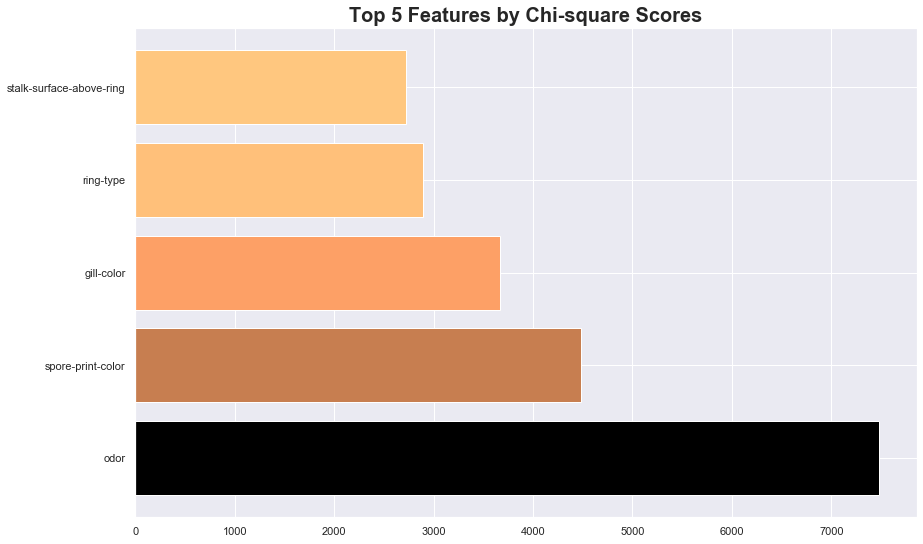

In [85]:
norm = plt.Normalize(min(values), max(values))
colors = plt.cm.copper_r(norm(values)) 

plt.figure()
plt.barh([i for i in range(5)], values,color=colors)
plt.gcf().set_size_inches(14, 9)
plt.yticks(range(0,5),keys)
plt.title('Top 5 Features by Chi-square Scores',weight='bold',size=20)
plt.show()

In [86]:
top5_features = keys
top5_features

['odor',
 'spore-print-color',
 'gill-color',
 'ring-type',
 'stalk-surface-above-ring']

In [87]:
top5_data = data[['odor',
 'spore-print-color',
 'gill-color',
 'ring-type',
 'stalk-surface-above-ring']]

top5_dummies = pd.get_dummies(top5_data)

In [88]:
X=np.array(top5_dummies)
Y=dropped_data['class']

In [89]:
# 10-fold 

kfold = KFold(n_splits=100, shuffle=True)

accuracy_kfold_list = []
#prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = Y[train_idx]
    y_test = Y[test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    #if(accuracy_kfold > prev_acc): # pick the best model
        #prev_acc = accuracy_kfold
        #model=LR

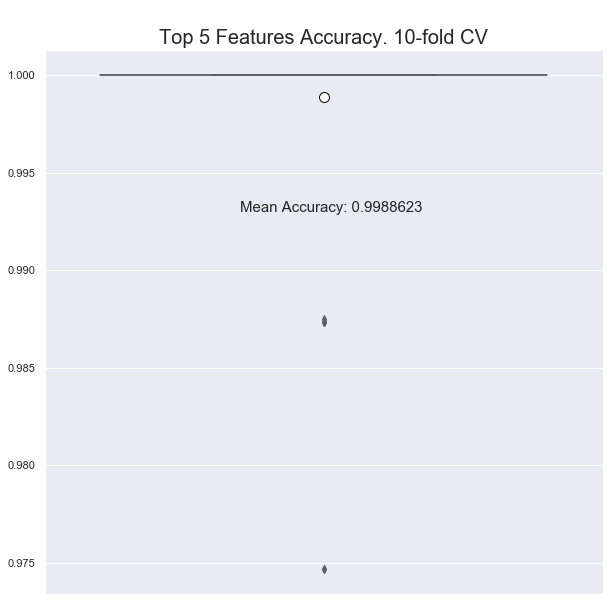

In [90]:
ax=sns.boxplot(accuracy_kfold_list,orient='v',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues")
plt.title("\nTop 5 Features Accuracy. 10-fold CV",size=20)
plt.gcf().set_size_inches(10,10)
plt.text(x=-0.15,y=0.993,s=("Mean Accuracy: "+str(round(np.mean(accuracy_kfold_list),7))),size=15)
plt.show()

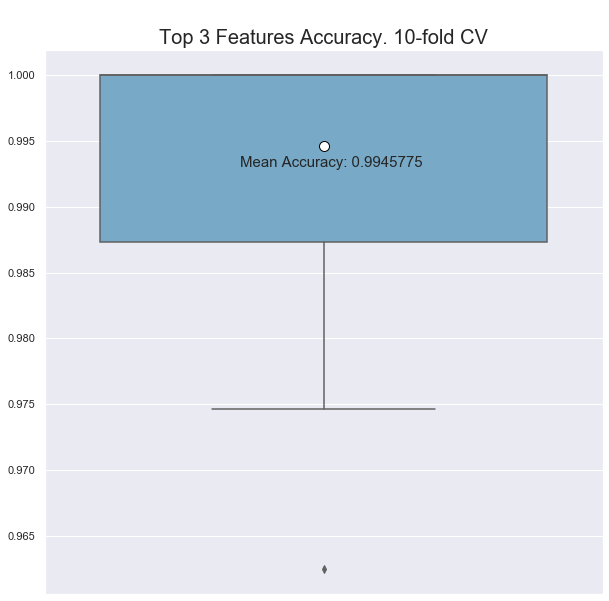

In [91]:
top3_data = data[['odor',
 'spore-print-color',
 'gill-color']]
top3_dummies = pd.get_dummies(top3_data)
X=np.array(top3_dummies)
Y=dropped_data['class']

# 10-fold
kfold = KFold(n_splits=100, shuffle=True)

accuracy_kfold_list = []
#prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = Y[train_idx]
    y_test = Y[test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies

ax=sns.boxplot(accuracy_kfold_list,orient='v',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues")
plt.title("\nTop 3 Features Accuracy. 10-fold CV",size=20)
plt.gcf().set_size_inches(10,10)
plt.text(x=-0.15,y=0.993,s=("Mean Accuracy: "+str(round(np.mean(accuracy_kfold_list),7))),size=15)
plt.show()

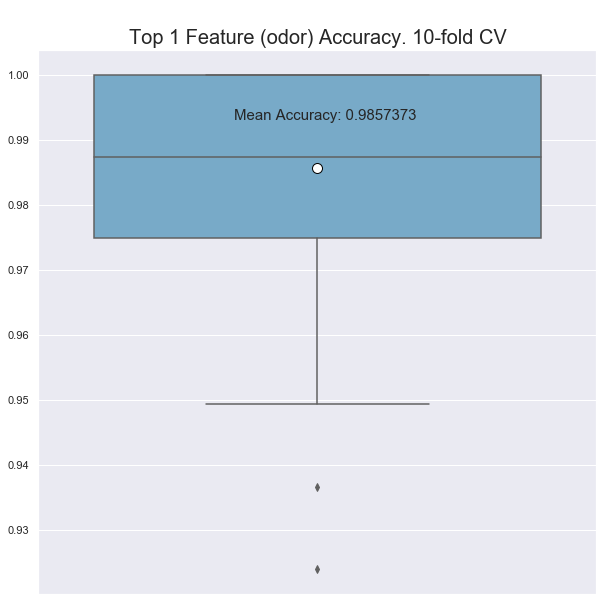

In [92]:
top1_data = data[['odor']]
top1_dummies = pd.get_dummies(top1_data)
X=np.array(top1_dummies)
Y=dropped_data['class']

# 10-fold
kfold = KFold(n_splits=100, shuffle=True)

accuracy_kfold_list = []
#prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = Y[train_idx]
    y_test = Y[test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies

ax=sns.boxplot(accuracy_kfold_list,orient='v',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues")
plt.title("\nTop 1 Feature (odor) Accuracy. 10-fold CV",size=20)
plt.gcf().set_size_inches(10,10)
plt.text(x=-0.15,y=0.993,s=("Mean Accuracy: "+str(round(np.mean(accuracy_kfold_list),7))),size=15)
plt.show()

In [93]:
import math
from collections import Counter

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

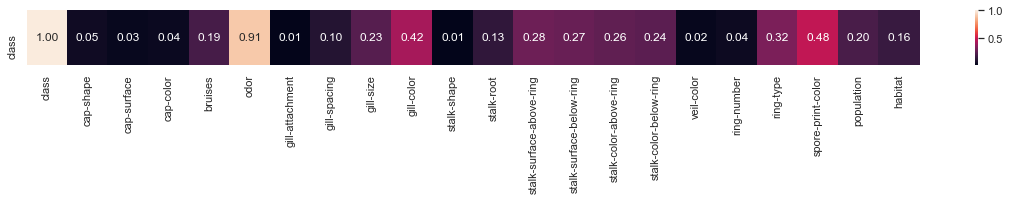

In [94]:
theilu = pd.DataFrame(index=['class'],columns=data.columns)
columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['class'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

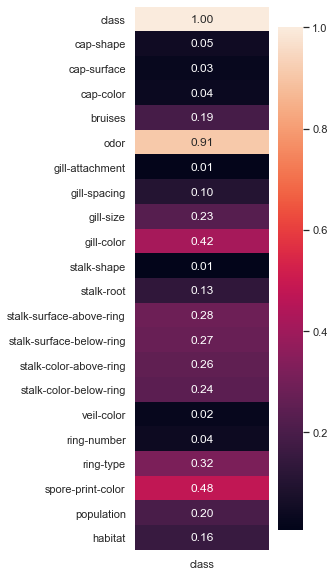

In [95]:
theilu = pd.DataFrame(index=['class'],columns=data.columns)
columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['class'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(3,10))
g=sns.heatmap(theilu.T,annot=True,fmt='.2f',annot_kws={'size':12})
plt.show()

Chi2 test on bar actually showed the same result before

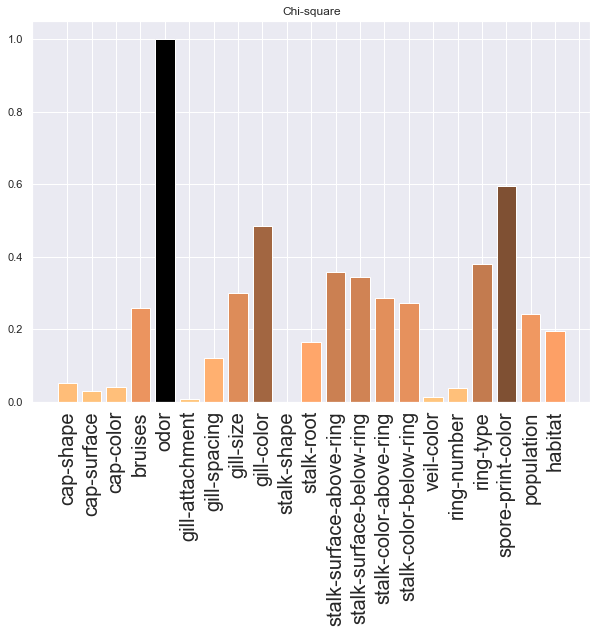

In [96]:
#chi2_scores.reverse()
norm = plt.Normalize(min(chi2_scores), max(chi2_scores))
colors = plt.cm.copper_r(norm(chi2_scores)) 

plt.bar([i for i in range(len(chi2_scores))], norm(chi2_scores),color=colors)
plt.gcf().set_size_inches(10,7)
plt.xticks(range(0,22),columns[1:],rotation=90,size=20)
plt.title('Chi-square')
plt.show()

As previously, we got the same top 5  features

In [97]:
top5_features

['odor',
 'spore-print-color',
 'gill-color',
 'ring-type',
 'stalk-surface-above-ring']

# Bar plots

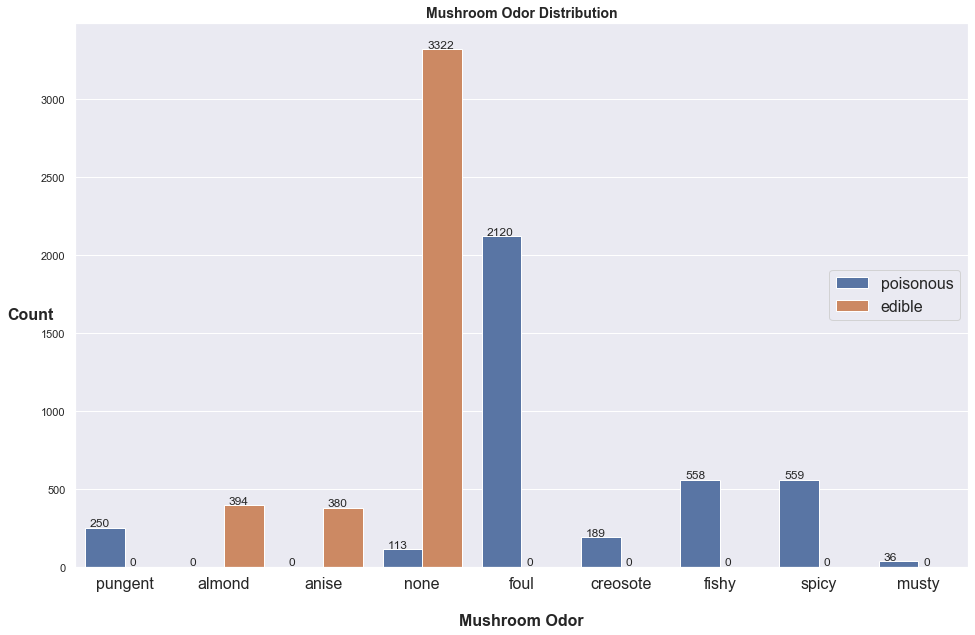

In [98]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='odor',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nMushroom Odor",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.05,0.45)
plt.title('Mushroom Odor Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

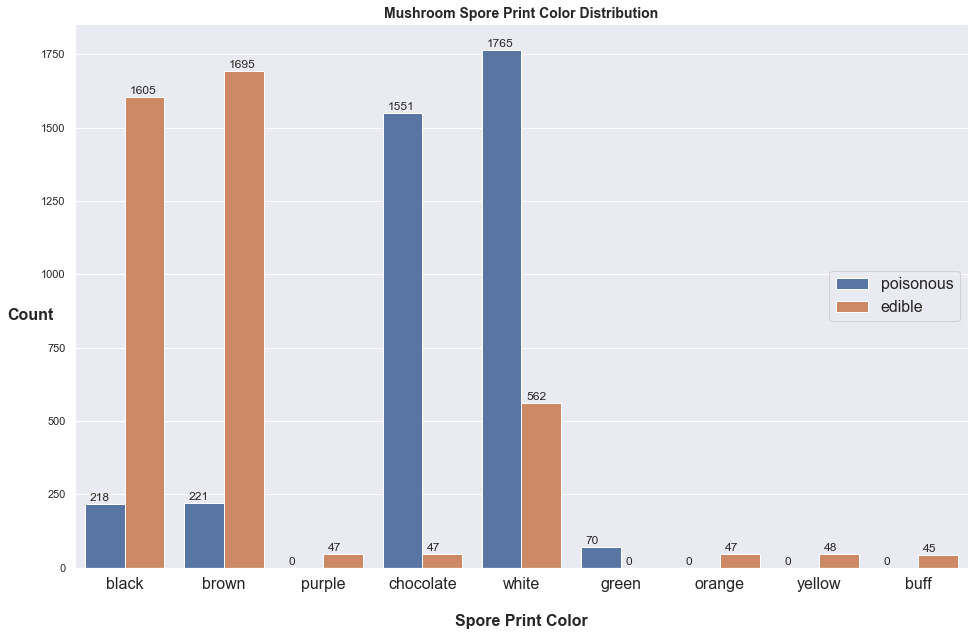

In [99]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='spore-print-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nSpore Print Color",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.05,0.45)
plt.title('Mushroom Spore Print Color Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

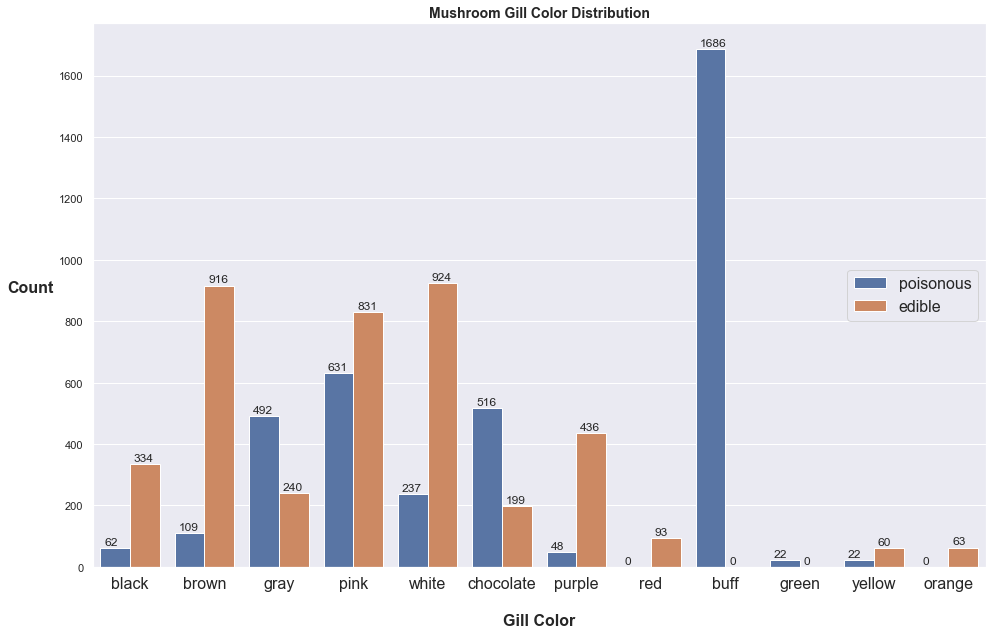

In [100]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='gill-color',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nGill Color",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.07,0.5)
plt.title('Mushroom Gill Color Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

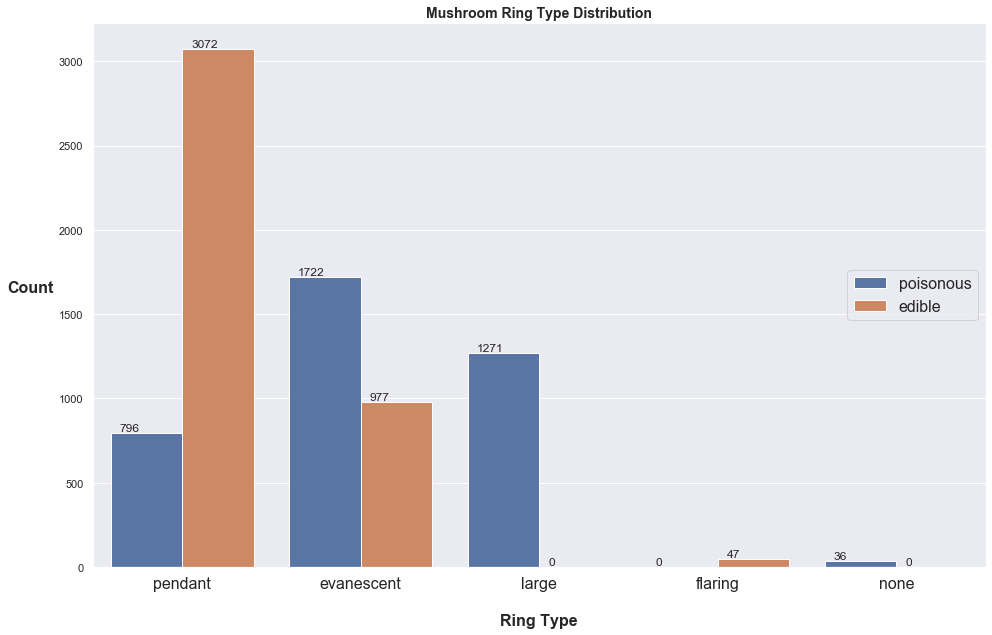

In [101]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='ring-type',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nRing Type",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.07,0.5)
plt.title('Mushroom Ring Type Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

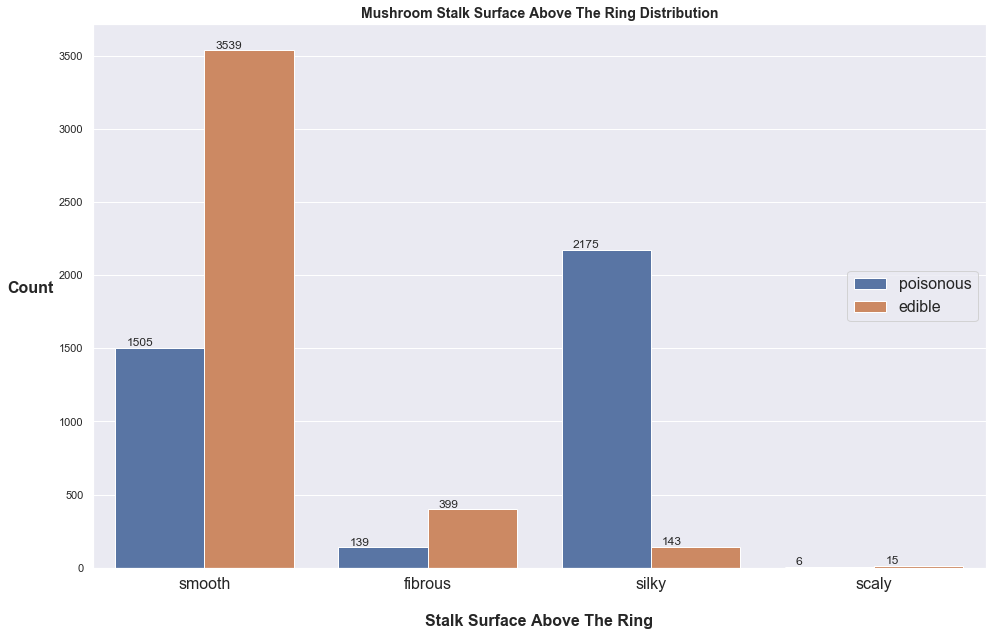

In [102]:
sns.set(rc={'figure.figsize':(16,10)})
ax=sns.countplot(x='stalk-surface-above-ring',hue='class',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10), xycoords ='data')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
plt.xlabel("\nStalk Surface Above The Ring",fontsize=16,weight='bold')
plt.ylabel("Count",fontsize=16, rotation=0,weight='bold')
ax.yaxis.set_label_coords(-0.07,0.5)
plt.title('Mushroom Stalk Surface Above The Ring Distribution', weight='bold', size=14)
plt.legend(loc='right',fontsize=16)
plt.show()

# WEDNESDAY 8.12.2020

In [103]:
top3_data = data[top5_features[:3]]

top3_dummies = pd.get_dummies(top3_data)
X = np.array(top3_dummies)
Y = dropped_data['class']
top3_dummies[:5]

,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore-print-color_black,...,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tss
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT

ROC = []
def evaluate_model(X, Y, method, repeats):
    accs=[]
    prev_acc = 0.0
    for repeat in range(repeats):
        x_train, x_test, y_train, y_test = tts(X, Y)
        method.fit(X,Y)
        y_scores = method.predict(x_test)
        accuracy = accuracy_score(y_test, y_scores)
        accs.append(accuracy)
        y_scores_proba = method.predict_proba(x_test)[:,1]
        
        if(accuracy > prev_acc): # pick the best model
            prev_acc = accuracy
            FPR, TPR, _ = roc_curve(y_test, y_scores_proba)
    ROC.append([FPR, TPR])
    return(accs)

KNN5 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=5),50)
KNN6 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=6),50)
KNN7 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=7),50)

# Logistic Regression
LR = LogisticRegression()
LRSTATS = evaluate_model(X, Y, model, 1)

# Gaussian
GNB = GaussianNB()
GNBSTATS = evaluate_model(X, Y, GNB, 1)

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDASTATS = evaluate_model(X, Y, LDA, 1)

# Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
QDASTATS = evaluate_model(X, Y, QDA, 1)

# ANN
ANN = ANN(alpha=1e-5, hidden_layer_sizes=(2,3,3), random_state=1)
ANNSTATS = evaluate_model(X, Y, ANN, 1)

# Support Vector Machines
SVM = SVC(kernel="rbf", probability=True)
SVMSTATS = evaluate_model(X, Y, SVM, 1)

#DT
DT=DT(max_depth=4,criterion="entropy")
DTSTATS = evaluate_model(X, Y, DT, 1)

sns.boxplot(data=[KNN5, KNN6, KNN7, LRSTATS, GNBSTATS, LDASTATS, QDASTATS, ANNSTATS, SVMSTATS, DTSTATS])

plt.title("Top 3 Features Accuracy\nUsing Different Machine Learning Algorithms",weight='bold',size=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["KNN-5","KNN-6", "KNN-7","LR", "GNB", "LDA", "QDA", "ANN", "SVM", "DT"],size=20);
plt.gcf().set_size_inches(15,10)
plt.show()

In [ ]:
# top 3 features

fpr,tpr = ROC[0]
plt.plot(fpr, tpr, label="KNN5. Accuracy: %0.7f'" % np.mean(KNN5))
fpr,tpr = ROC[1]
plt.plot(fpr, tpr, label="KNN6. Accuracy: %0.7f'" % np.mean(KNN6))
fpr,tpr = ROC[2]
plt.plot(fpr, tpr, label="KNN7. Accuracy: %0.7f'" % np.mean(KNN7))
fpr,tpr = ROC[3]
plt.plot(fpr, tpr, label="LR. Accuracy: %0.7f'" % np.mean(LRSTATS))
fpr,tpr = ROC[4]
plt.plot(fpr, tpr, label="GNB. Accuracy: %0.7f'" % np.mean(GNBSTATS))
fpr,tpr = ROC[5]
plt.plot(fpr, tpr, label="LDA. Accuracy: %0.7f'" % np.mean(LDASTATS))
fpr,tpr = ROC[6]
plt.plot(fpr, tpr, label="QDA. Accuracy: %0.7f'" % np.mean(QDASTATS))
fpr,tpr = ROC[7]
plt.plot(fpr, tpr, label="ANN. Accuracy: %0.7f'" % np.mean(ANNSTATS))
fpr,tpr = ROC[8]
plt.plot(fpr, tpr, label="SVM. Accuracy: %0.7f'" % np.mean(SVMSTATS))
fpr,tpr = ROC[9]
plt.plot(fpr, tpr, label="DT. Accuracy: %0.7f'" % np.mean(DTSTATS))

plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",weight='bold',fontsize=14)
plt.ylabel("True Positive Rate",weight='bold',fontsize=14)
plt.title("Top 3 Features ROC Curves",weight='bold',size=20)
plt.legend(fontsize=20)
plt.gcf().set_size_inches(12,12)

In [ ]:
top1_data = data[['odor']]
top1_dummies = pd.get_dummies(top1_data)
X=np.array(top1_dummies)
Y=dropped_data['class']
top1_dummies

In [ ]:
# top 1 feature ROC curve

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tss
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT

ROC = []
def evaluate_model(X, Y, method, repeats):
    accs=[]
    prev_acc = 0.0
    for repeat in range(repeats):
        x_train, x_test, y_train, y_test = tts(X, Y)
        method.fit(X,Y)
        y_scores = method.predict(x_test)
        accuracy = accuracy_score(y_test, y_scores)
        accs.append(accuracy)
        y_scores_proba = method.predict_proba(x_test)[:,1]
        
        if(accuracy > prev_acc): # pick the best model
            prev_acc = accuracy
            FPR, TPR, _ = roc_curve(y_test, y_scores_proba)
    ROC.append([FPR, TPR])
    return(accs)

KNN5 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=5),50)
KNN6 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=6),50)
KNN7 = evaluate_model(X,Y,KNeighborsClassifier(n_neighbors=7),50)

# Logistic Regression
LR = LogisticRegression()
LRSTATS = evaluate_model(X, Y, model, 50)

# Gaussian
GNB = GaussianNB()
GNBSTATS = evaluate_model(X, Y, GNB, 50)

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDASTATS = evaluate_model(X, Y, LDA, 50)

# Quadratic Discriminant Analysis
#QDA = QuadraticDiscriminantAnalysis()
#QDASTATS = evaluate_model(X, Y, QDA, 50)

# ANN
ANN = ANN(alpha=1e-5, hidden_layer_sizes=(2,3,3), random_state=1)
ANNSTATS = evaluate_model(X, Y, ANN, 50)

# Support Vector Machines
SVM = SVC(kernel="rbf", probability=True)
SVMSTATS = evaluate_model(X, Y, SVM, 50)

#DT
DT=DT(max_depth=4,criterion="entropy")
DTSTATS = evaluate_model(X, Y, DT, 50)

sns.boxplot(data=[KNN5, KNN6, KNN7, LRSTATS, GNBSTATS, LDASTATS, ANNSTATS, SVMSTATS, DTSTATS])

plt.title("Top 1 Feature (Odor) Accuracy\nUsing Different Machine Learning Algorithms",weight='bold',size=15)
plt.xticks([0,1,2,3,4,5,6,7,8],["KNN-5","KNN-6", "KNN-7","LR", "GNB", "LDA", "ANN", "SVM", "DT"],size=20);
plt.gcf().set_size_inches(15,10)
plt.show()

In [ ]:
sns.boxplot(data=[KNN5, KNN6, KNN7, LRSTATS, GNBSTATS, LDASTATS, SVMSTATS, DTSTATS])
plt.title("Top 1 Feature (Odor) Accuracy\nUsing Different Machine Learning Algorithms",weight='bold',size=15)
plt.xticks([0,1,2,3,4,5,6,7,8],["KNN-5","KNN-6", "KNN-7","LR", "GNB", "LDA", "SVM", "DT"],size=20);
plt.gcf().set_size_inches(15,10)
plt.show()

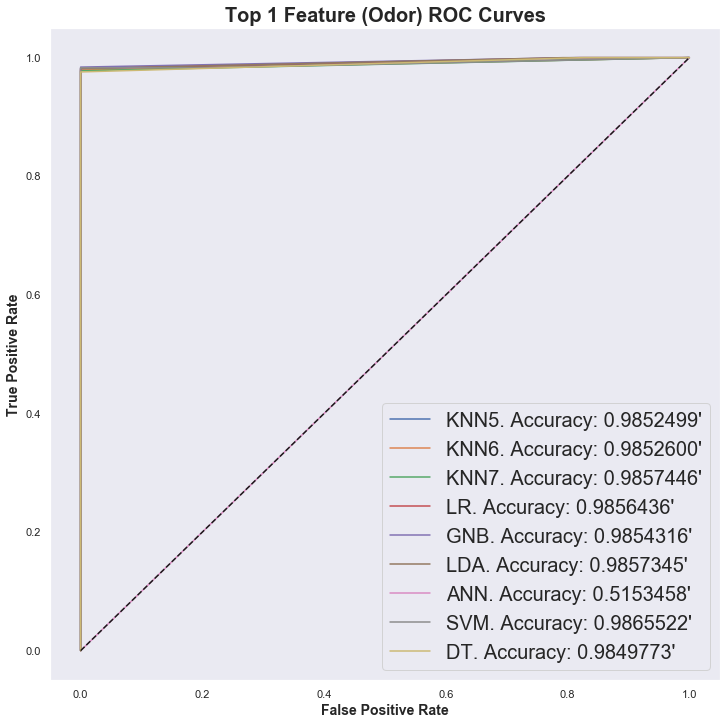

In [109]:
# top 1 feature
# plot the best model

fpr,tpr = ROC[0]
plt.plot(fpr, tpr, label="KNN5. Accuracy: %0.7f'" % np.mean(KNN5))
fpr,tpr = ROC[1]
plt.plot(fpr, tpr, label="KNN6. Accuracy: %0.7f'" % np.mean(KNN6))
fpr,tpr = ROC[2]
plt.plot(fpr, tpr, label="KNN7. Accuracy: %0.7f'" % np.mean(KNN7))
fpr,tpr = ROC[3]
plt.plot(fpr, tpr, label="LR. Accuracy: %0.7f'" % np.mean(LRSTATS))
fpr,tpr = ROC[4]
plt.plot(fpr, tpr, label="GNB. Accuracy: %0.7f'" % np.mean(GNBSTATS))
fpr,tpr = ROC[5]
plt.plot(fpr, tpr, label="LDA. Accuracy: %0.7f'" % np.mean(LDASTATS))
fpr,tpr = ROC[6]
plt.plot(fpr, tpr, label="ANN. Accuracy: %0.7f'" % np.mean(ANNSTATS))
fpr,tpr = ROC[7]
plt.plot(fpr, tpr, label="SVM. Accuracy: %0.7f'" % np.mean(SVMSTATS))
fpr,tpr = ROC[8]
plt.plot(fpr, tpr, label="DT. Accuracy: %0.7f'" % np.mean(DTSTATS))

plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",weight='bold',fontsize=14)
plt.ylabel("True Positive Rate",weight='bold',fontsize=14)
plt.title("Top 1 Feature (Odor) ROC Curves",weight='bold',size=20)
plt.legend(fontsize=20)
plt.gcf().set_size_inches(12,12)

#### Machine learning algorithms on all features
(Bronte's part)

In [110]:
X = np.array(data_dummies.drop(columns=['class'],axis=1))
Y = data_dummies['class']

In [111]:
# ROC curve

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve

# Logistic regression with regular 75/25 split, one try

model = LR()
x_train, x_test, y_train, y_test = tts(X, data_dummies['class'])
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

print("Accuracy:",accuracy_LR)

Accuracy: 0.9979808177688037


In [112]:
# KNN

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import auc

x_train, x_test, y_train, y_test = tts(X, Y)
KNN = KNN(n_neighbors = 10)
KNN.fit(x_train,y_train)

y_scores = KNN.predict_proba(x_test)
FPR_KNN, TPR_KNN, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_KNN = auc(FPR_KNN, TPR_KNN)
print("Accuracy:",accuracy_KNN)

Accuracy: 1.0


In [113]:
# ANN

from sklearn.neural_network import MLPClassifier as ANN

x_train, x_test, y_train, y_test = tts(X, Y)
ANN = ANN(alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2,3,3), random_state=1)
ANN.fit(x_train, y_train)

y_scores = ANN.predict_proba(x_test)
FPR_ANN, TPR_ANN, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_ANN = auc(FPR_ANN, TPR_ANN)
print("Accuracy:",accuracy_ANN)

Accuracy: 1.0


In [114]:
# GNB

from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = tts(X, Y)
GNB = GaussianNB()
GNB.fit(x_train, y_train)

y_scores = ANN.predict_proba(x_test)
FPR_GNB, TPR_GNB, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_GNB = auc(FPR_GNB, TPR_GNB)
print("Accuracy:",accuracy_GNB)

Accuracy: 1.0


In [115]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train, y_train)

y_scores = QDA.predict_proba(x_test)
FPR_QDA, TPR_QDA, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_QDA = auc(FPR_QDA, TPR_QDA)
print("Accuracy:",accuracy_QDA)

Accuracy: 1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [116]:
# LDA

LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

y_scores = LDA.predict_proba(x_test)
FPR_LDA, TPR_LDA, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_LDA = auc(FPR_LDA, TPR_LDA)
print("Accuracy:",accuracy_LDA)

Accuracy: 0.9989669421487604


In [117]:
#Support Vector Machines

from sklearn.svm import SVC

SVM = SVC(kernel="rbf", probability=True)
x_train, x_test, y_train, y_test = tts(X, Y)
SVM.fit(x_train, y_train)

y_scores = SVM.predict_proba(x_test)
FPR_SVM, TPR_SVM, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_SVM = auc(FPR_SVM, TPR_SVM)
print("Accuracy:",accuracy_SVM)

Accuracy: 1.0


In [118]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier as DT

model=DT(max_depth=4,criterion="entropy")
x_train, x_test, y_train, y_test = tts(X, Y)
model.fit(x_train,y_train)

y_scores = model.predict_proba(x_test)
FPR_DT, TPR_DT, _ = roc_curve(y_test, y_scores[:, 1])
accuracy_DT = auc(FPR_DT, TPR_DT)
print("Accuracy:",accuracy_DT)

Accuracy: 0.9973501590824102


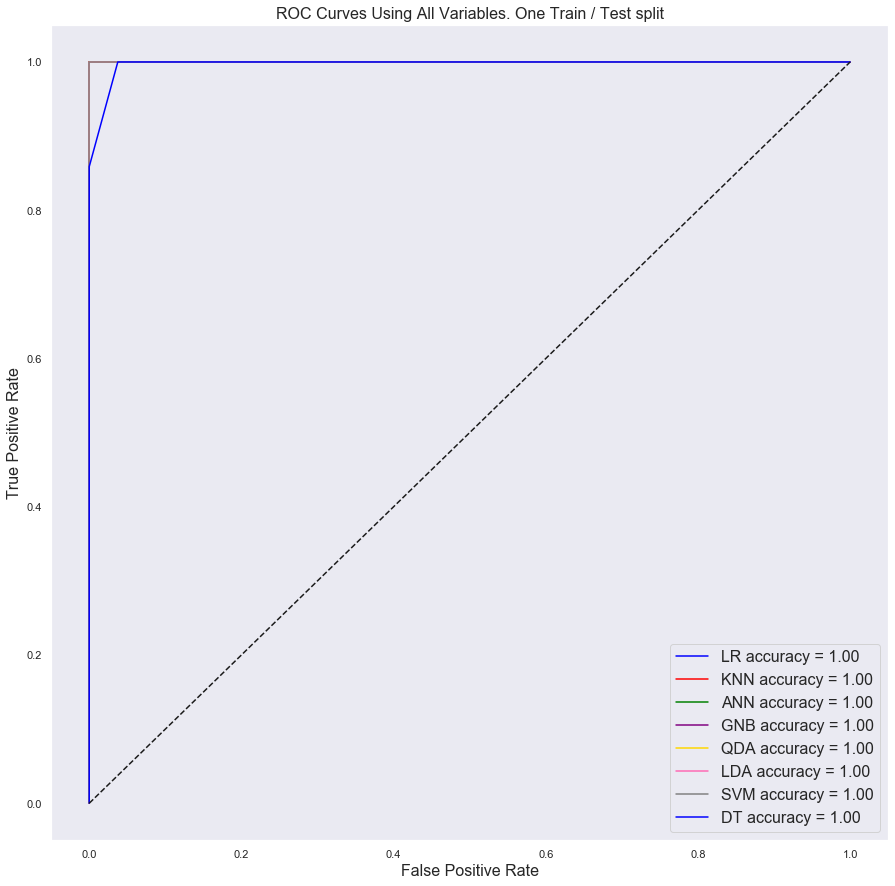

In [119]:
# ROC Curve for various ML algorithms using all variables

plt.plot(FPR_LR, TPR_LR, c="blue", label = 'LR accuracy = %0.2f' % accuracy_LR)
plt.plot(FPR_KNN, TPR_KNN, c="red", label = 'KNN accuracy = %0.2f' % accuracy_KNN)
plt.plot(FPR_ANN, TPR_ANN, c="green", label = 'ANN accuracy = %0.2f' % accuracy_ANN)
plt.plot(FPR_GNB, TPR_GNB, c="purple", label = 'GNB accuracy = %0.2f' % accuracy_GNB)
plt.plot(FPR_QDA, TPR_QDA, c="gold", label = 'QDA accuracy = %0.2f' % accuracy_QDA)
plt.plot(FPR_QDA, TPR_QDA, c="hotpink", label = 'LDA accuracy = %0.2f' % accuracy_LDA)
plt.plot(FPR_SVM, TPR_SVM, c="grey", label = 'SVM accuracy = %0.2f' % accuracy_SVM)
plt.plot(FPR_DT, TPR_DT, c="blue", label = 'DT accuracy = %0.2f' % accuracy_DT)
plt.plot([0,1],[0,1],c="k",ls="--")
plt.legend(loc = 'lower right', fontsize=16)
plt.grid()
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curves Using All Variables. One Train / Test split", fontsize=16)
plt.gcf().set_size_inches(15,15)

In [120]:
# Accuracy Boxplot for various ML algorithms using all variables

from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT

def evaluate_model(X, Y, method, repeats):
    accs=[]
    for repeat in range(repeats):
        x_train, x_test, y_train, y_test = tts(X, Y)
        method.fit(X,Y)
        y_predict = method.predict(x_test)
        accs.append(accuracy_score(y_test, y_predict))
    return(accs)

#LR
LRSTATS = evaluate_model(X, Y, LR(), 50)

#ANN
ANN = MLPClassifier(alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2,3,3), random_state=1)
ANNSTATS = evaluate_model(X, Y, ANN, 50)

# Gaussian
GNB = GaussianNB()
GNBSTATS = evaluate_model(X, Y, GNB, 50)

#KNN
KNN = KNN(n_neighbors = 3)
KNNSTATS = evaluate_model(X, Y, KNN, 10)

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDASTATS = evaluate_model(X, Y, LDA, 50)

# Quadratic Discriminant Analysis
#QDA = QuadraticDiscriminantAnalysis()
#QDASTATS = evaluate_model(X, Y, QDA, 50)

# Support Vector Machines
SVM = SVC(kernel="rbf", probability=True)
SVMSTATS = evaluate_model(X, Y, SVM, 50)

#DT
DT=DT(max_depth=4,criterion="entropy")
DTSTATS = evaluate_model(X, Y, DT, 50)

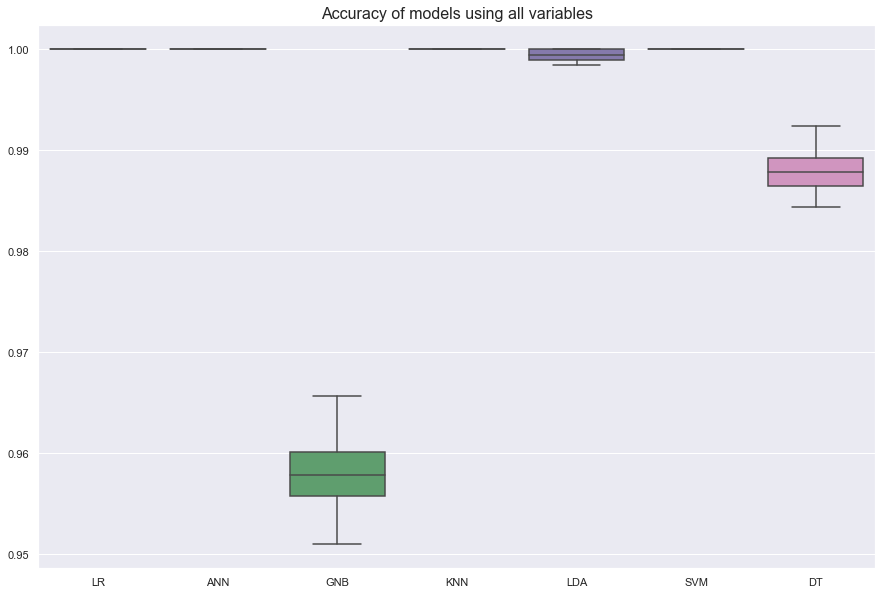

In [121]:
sns.boxplot(data=[LRSTATS,ANNSTATS,GNBSTATS,KNNSTATS, LDASTATS, SVMSTATS, DTSTATS])

plt.xticks([0,1,2,3,4,5,6],["LR","ANN","GNB","KNN","LDA", "SVM", "DT"])
plt.title("Accuracy of models using all variables", fontsize=16)
plt.gcf().set_size_inches(15,10)
plt.show()

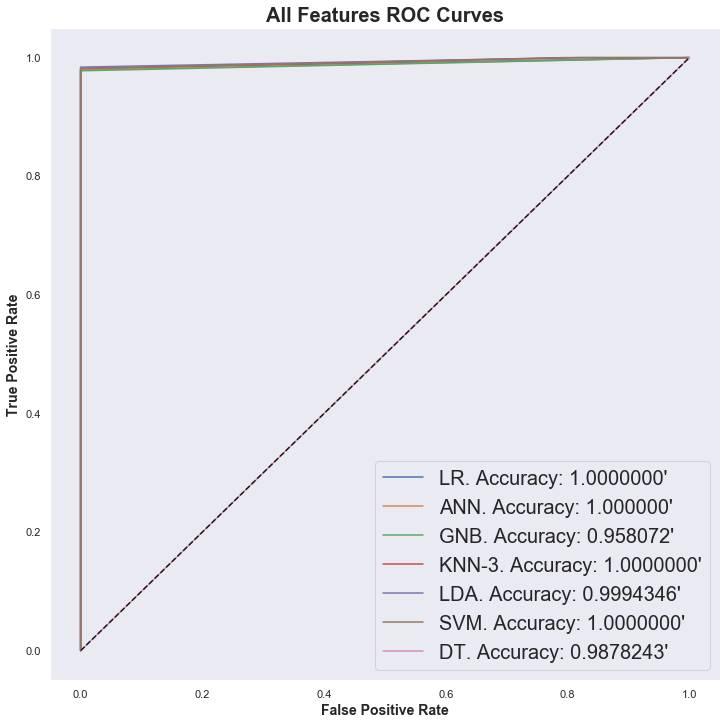

In [122]:
fpr,tpr = ROC[0]
plt.plot(fpr, tpr, label="LR. Accuracy: %0.7f'" % np.mean(LRSTATS))
fpr,tpr = ROC[1]
plt.plot(fpr, tpr, label="ANN. Accuracy: %0.6f'" % np.mean(ANNSTATS))
fpr,tpr = ROC[2]
plt.plot(fpr, tpr, label="GNB. Accuracy: %0.6f'" % np.mean(GNBSTATS))
fpr,tpr = ROC[3]
plt.plot(fpr, tpr, label="KNN-3. Accuracy: %0.7f'" % np.mean(KNNSTATS))
fpr,tpr = ROC[4]
plt.plot(fpr, tpr, label="LDA. Accuracy: %0.7f'" % np.mean(LDASTATS))
fpr,tpr = ROC[5]
plt.plot(fpr, tpr, label="SVM. Accuracy: %0.7f'" % np.mean(SVMSTATS))
fpr,tpr = ROC[6]
plt.plot(fpr, tpr, label="DT. Accuracy: %0.7f'" % np.mean(DTSTATS))

plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",weight='bold',fontsize=14)
plt.ylabel("True Positive Rate",weight='bold',fontsize=14)
plt.title("All Features ROC Curves",weight='bold',size=20)
plt.legend(fontsize=20)
plt.gcf().set_size_inches(12,12)

In [ ]:
y